In [374]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd as rSVD

In [375]:
# matrix = (np.random.random((150, 200)) * 255)

matrix = (plt.imread("fmph.jpg")[:,:,0]).astype(float) # nezabudnut na pretypovanie, inak to ma "opacny" efekt
matrix.shape

(451, 600)

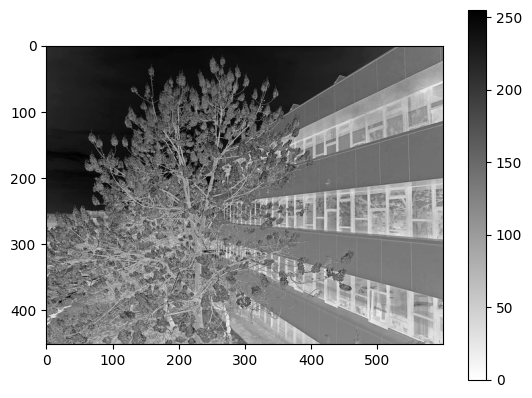

In [376]:
plt.imshow(matrix, cmap='gray_r')
plt.colorbar()

In [377]:
c = 10
rows = 225
sampled = matrix.copy()
sampled[0: rows, ] *= c
sampled.max()

2550.0

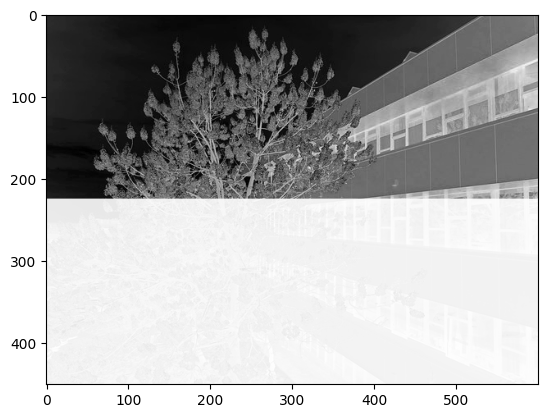

In [378]:
plt.imshow(sampled, cmap='gray_r')

In [379]:
rank = 30
U, S, V = rSVD(matrix.copy(), rank, random_state=0)
approx_orig = (U @(V * S[:, None])).astype(int)
U, S, V = rSVD(sampled.copy(), rank, random_state=0)
approx_sampled = U @(V * S[:, None])
approx_sampled[0:rows, ] /= c
approx_sampled = approx_sampled.astype(int)

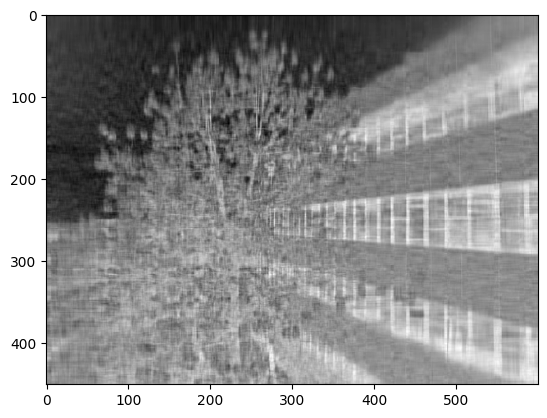

In [380]:
plt.imshow(approx_orig, cmap='gray_r')

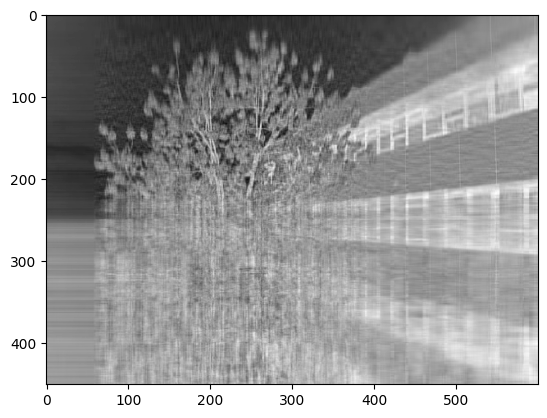

In [381]:
plt.imshow(approx_sampled, cmap='gray_r')

chyba hornej casti: 6608.390424301519
chyba dolnej casti: 7830.083077464759
celkova chyba: 10246.024838931438


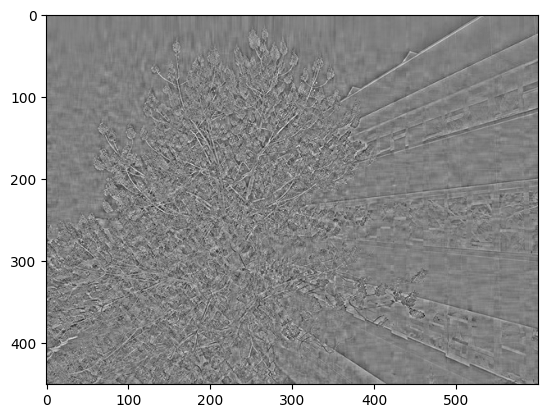

In [382]:
plt.imshow(matrix - approx_orig, cmap='gray_r')
print(f"chyba hornej casti: {np.linalg.norm(matrix[0:rows, ] - approx_orig[0:rows, ])}")
print(f"chyba dolnej casti: {np.linalg.norm(matrix[rows:, ] - approx_orig[rows:, ])}")
print(f"celkova chyba: {np.linalg.norm(matrix - approx_orig)}")

chyba hornej casti: 5586.878287559162
chyba dolnej casti: 10368.468208949671
celkova chyba: 11777.87510546788


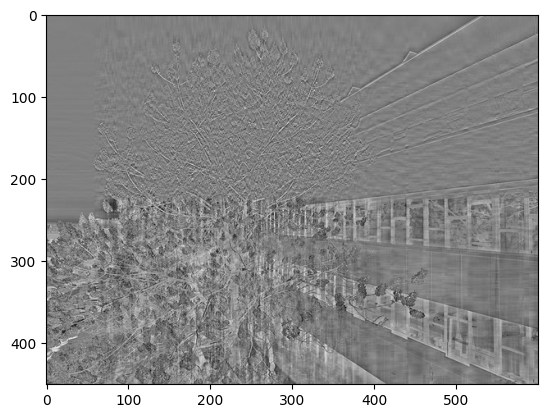

In [383]:
plt.imshow(matrix - approx_sampled, cmap='gray_r')
print(f"chyba hornej casti: {np.linalg.norm(matrix[0:rows, ] - approx_sampled[0:rows, ])}")
print(f"chyba dolnej casti: {np.linalg.norm(matrix[rows:, ] - approx_sampled[rows:, ])}")
print(f"celkova chyba: {np.linalg.norm(matrix - approx_sampled)}")